In [1]:
from cloudpathlib import AnyPath
from eosets.pair import Pair
from eoreader.bands import NBR
from matplotlib import pyplot as plt
import cartopy.crs as ccrs

In [2]:
# Create logger
import logging
from sertit import logs

logs.init_logger(logging.getLogger("eoreader"), log_lvl=logging.INFO)
logs.init_logger(logging.getLogger("eosets"))

In [3]:
# Get the base paths
data_path = AnyPath(r"/home/ds2_db3/CI/eosets/PAIR")
db_path = AnyPath(r"/home/ds2_db2/BASES_DE_DONNEES")

In [4]:
# Get a dictionary of Sentinel-2, Sentinel-3 and Landsat-8 pivot and child images
s2_paths = {
    "pivot_paths": [data_path / "S2A_MSIL1C_20200824T110631_N0209_R137_T29TQE_20200824T150432.zip"],
    "child_paths": [data_path / "S2B_MSIL1C_20200908T110619_N0209_R137_T29TQE_20200908T132324.zip"],
}

s3_paths = {
    "pivot_paths": [data_path / "S3B_SL_1_RBT____20200824T105515_20200824T105815_20200825T151744_0179_042_322_2340_LN2_O_NT_004.SEN3"],
    "child_paths": [data_path / "S3B_SL_1_RBT____20200909T104016_20200909T104316_20200910T161910_0179_043_165_2340_LN2_O_NT_004.SEN3"],
}

l8_paths = {
    "pivot_paths": [data_path / "LC08_L1TP_202032_20200828_20200906_02_T1.tar"],
    "child_paths": [data_path / "LC08_L1TP_202032_20200929_20201006_02_T1.tar"],
}

all_paths = [s2_paths, s3_paths, l8_paths]

aoi_path = data_path / "Fire_Spain.geojson"

2023-04-14 15:40:20,051 - [DEBUG] - *** Loading ['NBR'] for 20200824T110631_S2_T29TQE_L1C_150432 ***


2023-04-14 15:40:21,676 - [DEBUG] - Merging bands NBR


ERROR 4: window: No such file or directory
Warning 1: Can't open window. Skipping it
ERROR 4: `/home/ds2_db3/CI/eosets/PAIR/Fire_Spain.geojson' not recognized as a supported file format.
Warning 1: Can't open /home/ds2_db3/CI/eosets/PAIR/Fire_Spain.geojson. Skipping it
2023-04-14 15:40:21,765 - [DEBUG] - Collocating bands


2023-04-14 15:40:21,768 - [DEBUG] - *** Loading ['NBR'] for 20200908T110619_S2_T29TQE_L1C_132324 ***


0...10...20...30...40...50...60...70...80...90...100 - done.


2023-04-14 15:40:23,362 - [DEBUG] - Merging bands NBR


ERROR 4: window: No such file or directory
Warning 1: Can't open window. Skipping it
ERROR 4: `/home/ds2_db3/CI/eosets/PAIR/Fire_Spain.geojson' not recognized as a supported file format.
Warning 1: Can't open /home/ds2_db3/CI/eosets/PAIR/Fire_Spain.geojson. Skipping it
2023-04-14 15:40:23,444 - [DEBUG] - Collocating bands


0...10...20...30...40...50...60...70...80...90...100 - done.


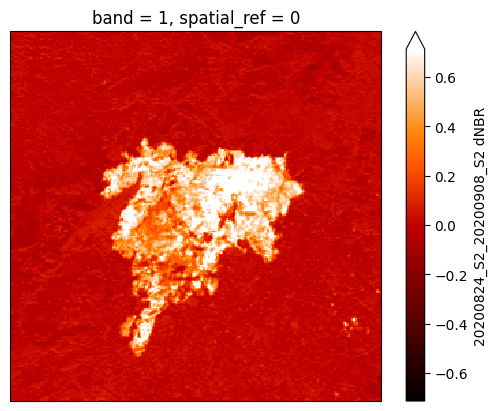

2023-04-14 15:40:34,888 - [DEBUG] - *** Loading ['NBR'] for 20200824T105515_S3_SLSTR_RBT ***


2023-04-14 15:40:49,693 - [DEBUG] - Merging bands NBR


ERROR 4: window: No such file or directory
Warning 1: Can't open window. Skipping it
ERROR 4: `/home/ds2_db3/CI/eosets/PAIR/Fire_Spain.geojson' not recognized as a supported file format.
Warning 1: Can't open /home/ds2_db3/CI/eosets/PAIR/Fire_Spain.geojson. Skipping it
2023-04-14 15:40:49,771 - [DEBUG] - Collocating bands


2023-04-14 15:40:49,774 - [DEBUG] - *** Loading ['NBR'] for 20200909T104016_S3_SLSTR_RBT ***


0...10...20...30...40...50...60...70...80...90...100 - done.


2023-04-14 15:41:05,000 - [DEBUG] - Merging bands NBR


ERROR 4: window: No such file or directory
Warning 1: Can't open window. Skipping it
ERROR 4: `/home/ds2_db3/CI/eosets/PAIR/Fire_Spain.geojson' not recognized as a supported file format.
Warning 1: Can't open /home/ds2_db3/CI/eosets/PAIR/Fire_Spain.geojson. Skipping it
2023-04-14 15:41:05,081 - [DEBUG] - Collocating bands


0...10...20...30...40...50...60...70...80...90...100 - done.


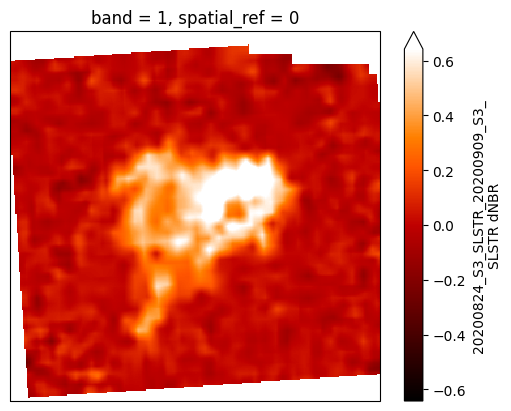

2023-04-14 15:41:09,953 - [DEBUG] - *** Loading ['NBR'] for 20200828T110153_L8_202032_OLI_TIRS ***


2023-04-14 15:41:10,362 - [DEBUG] - Merging bands NBR


ERROR 4: window: No such file or directory
Warning 1: Can't open window. Skipping it
ERROR 4: `/home/ds2_db3/CI/eosets/PAIR/Fire_Spain.geojson' not recognized as a supported file format.
Warning 1: Can't open /home/ds2_db3/CI/eosets/PAIR/Fire_Spain.geojson. Skipping it
2023-04-14 15:41:10,436 - [DEBUG] - Collocating bands


2023-04-14 15:41:10,439 - [DEBUG] - *** Loading ['NBR'] for 20200929T110204_L8_202032_OLI_TIRS ***


0...10...20...30...40...50...60...70...80...90...100 - done.


2023-04-14 15:41:10,849 - [DEBUG] - Merging bands NBR


ERROR 4: window: No such file or directory
Warning 1: Can't open window. Skipping it
ERROR 4: `/home/ds2_db3/CI/eosets/PAIR/Fire_Spain.geojson' not recognized as a supported file format.
Warning 1: Can't open /home/ds2_db3/CI/eosets/PAIR/Fire_Spain.geojson. Skipping it
2023-04-14 15:41:10,935 - [DEBUG] - Collocating bands


0...10...20...30...40...50...60...70...80...90...100 - done.


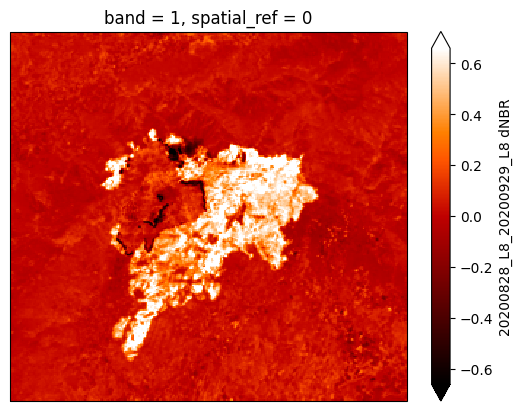

In [5]:
for paths in all_paths:
    # Create pair with pivot and child paths
    pair = Pair(**paths)

    # Load dNBR
    _, _, dnbr = pair.load(
        diff_bands=NBR,
        window=aoi_path,
        pixel_size=60
    )
    dnbr = dnbr[NBR]
    dnbr.attrs["long_name"] = f"{pair.condensed_name} dNBR"

    # Plot the pairs
    crs = ccrs.UTM(str(dnbr.rio.crs.to_epsg())[-2:])
    dnbr.plot(
        robust=True,
        transform=crs,
        x="x",
        y="y",
        cmap="gist_heat",
        subplot_kws={'projection':crs}
    )
    plt.show()